**Prompt**

Your task in this week’s assignment is to load a dataset, perform some minor cleanup and transformation tasks, then use exploratory data analysis to learn about the distribution of variables and the relationship between variables.
Here is a link to the “Auto MPG” dataset in the UC Irvine data repository: 
https://archive.ics.uci.edu/ml/datasets/Auto+MPG

# 1. Load the data in the (yellow highlighted) Data Folder in the file auto-mpg.data into a pandas DataFrame.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 1 columns):
 #   Column                                                                                Non-Null Count  Dtype 
---  ------                                                                                --------------  ----- 
 0   18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"  397 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [4]:
df.head()

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...


In its current form, because the values are separated by spaces and not commas, all values are in a single column.

In [5]:
# read the data, this time specifying the delimiter as 1 or more spaces between values
# specifying the header=None parameter will add a numerical header for each column
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delimiter=r"\s+", header=None)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       398 non-null    float64
 1   1       398 non-null    int64  
 2   2       398 non-null    float64
 3   3       398 non-null    object 
 4   4       398 non-null    float64
 5   5       398 non-null    float64
 6   6       398 non-null    int64  
 7   7       398 non-null    int64  
 8   8       398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# 2/3. Review the data and the provided data set description. Use the attribute information provided in auto-mpg.names to name your pandas DataFrame columns.

auto-mpg.names offers the following information about attributes:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)



In [8]:
# rename column headers
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


#4. Some of the horsepower data is marked as missing with a ‘?’. You need to replace this ‘?’ with a pandas-appropriate missing value, then convert the column to numeric.

In [9]:
# check sum of null values in each column
df.isnull().sum() # there are no null values

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [10]:
# replace ? values with NaN
df.horsepower.replace('?', np.nan, inplace=True)

In [11]:
# convert all horsepower values to numeric
df["horsepower"] = pd.to_numeric(df["horsepower"])

# 5. The origin column values are 1, 2, and 3. Convert these values respectively to ‘USA’, ‘Asia’, and ‘Europe.’

In [12]:
df.loc[(df.origin == 1),'origin']='USA'
df.loc[(df.origin == 2),'origin']='Asia'
df.loc[(df.origin == 3),'origin']='Europe'

In [13]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino


# 6. Create a bar chart that shows the distribution for cylinders.

The first chart is created using matplotlib. Around 200 of the 398 cars have 4 cylinders.

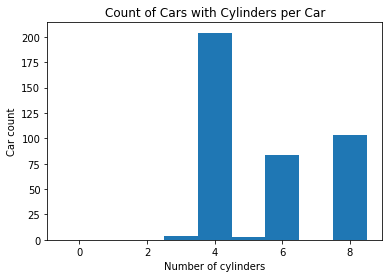

In [14]:
plt.hist(df['cylinders'], bins=np.arange(10)-0.5);
plt.xlabel('Number of cylinders');
plt.ylabel('Car count');
plt.title('Count of Cars with Cylinders per Car');

The second chart is created using seaborn. This chart shows that about 50% of the cars have 4 cylinders.

c:\users\snr13\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


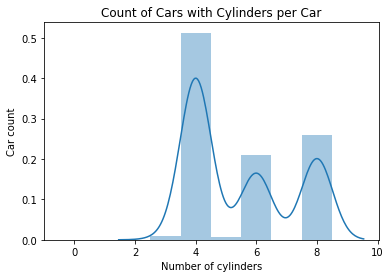

In [15]:
sns.distplot(df['cylinders'], bins=np.arange(10)-0.5);
plt.xlabel('Number of cylinders')
plt.ylabel('Car count')
plt.title('Count of Cars with Cylinders per Car');

# 7. Create a scatterplot that shows the relationship between horsepower and weight.

It appears that as horsepower increases, so does weight.

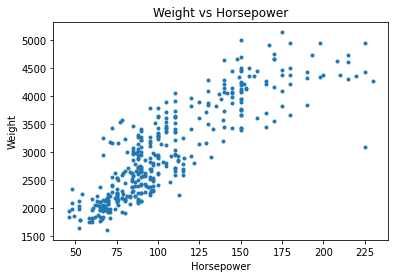

In [16]:
plt.scatter(df['horsepower'], df['weight'], marker='.');
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.title('Weight vs Horsepower');

A jointplot created by seaborn includes a trendline that shows the relationship between horsepower and weight.

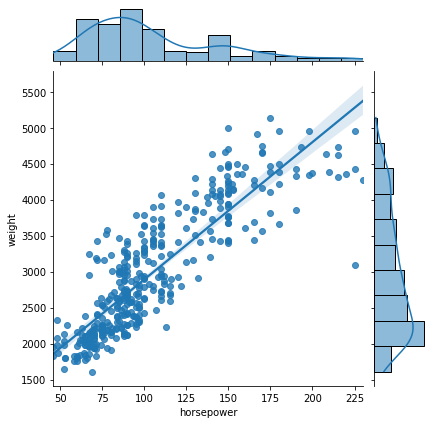

In [17]:
sns.jointplot(x='horsepower', y='weight', data=df, kind='reg');

# 8. Ask, then answer (using matplotlib and seaborn graphics capabilities) an interesting question about the distribution of one of the variables, or the relationship between two (or more!) of the variables in the “Auto MPG” dataset.

## Question
Is there a relationship between origin and average acceleration, horsepower, and weight?

In this dataset, the majority of cars originate from the USA.

In [18]:
grouped_by_origin = df.groupby('origin')
grouped_by_origin.size()

origin
Asia       70
Europe     79
USA       249
dtype: int64

In [19]:
stats_by_origin = grouped_by_origin[['acceleration', 'horsepower', 'weight']].mean()
stats_by_origin

,acceleration,horsepower,weight
origin,,,
Asia,16.787143,80.558824,2423.300000
Europe,16.172152,79.835443,2221.227848
USA,15.033735,119.048980,3361.931727


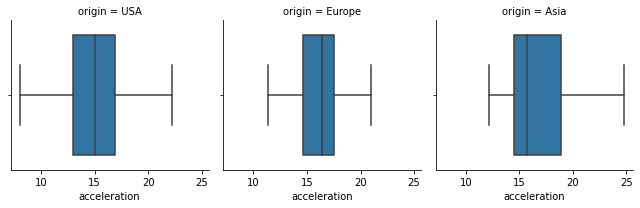

In [20]:
g = sns.FacetGrid(df, col="origin")
g.map(sns.boxplot, "acceleration", order=None)

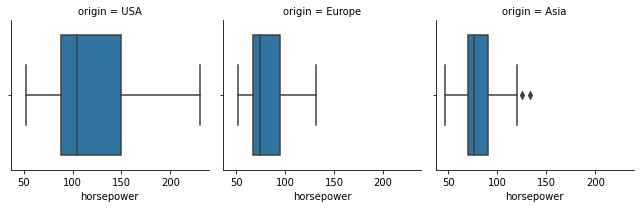

In [21]:
g = sns.FacetGrid(df, col="origin")
g.map(sns.boxplot, "horsepower", order=None)

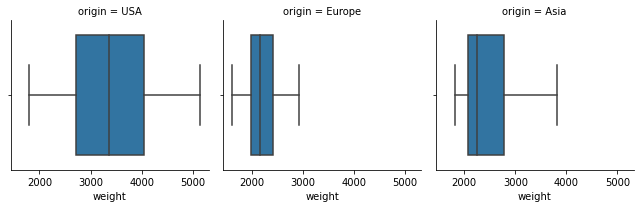

In [22]:
g = sns.FacetGrid(df, col="origin")
g.map(sns.boxplot, "weight", order=None)

## Answer
Because over 80% of the cars in this dataset originate from the USA, the results of this exploration may be misleading. However, it appears that although mean acceleration of cars originating from the USA is less than that of Europe and Asia, horsepower ane weight of USA originating cars are greater those originating in Europe and Asia.